In [1]:
IMAGE_AUGMENTATION=True
AUGMENTATION_RATIO=1
batch_size=32
E=1

In [2]:
import pandas as pd
import numpy as np
import warnings 
from sklearn.model_selection import train_test_split

# from tensorflow.keras.applications import DenseNet121,VGG16
from sklearn.preprocessing import OneHotEncoder
import random
import tensorflow as tf
# from data_processing import data_processing
from data_2 import data_simulate_noniid
import math

2024-10-21 16:47:32.687106: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 16:47:32.709970: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 16:47:32.709991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 16:47:32.710005: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 16:47:32.714381: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 16:47:32.714772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [3]:
# train_x,train_y,train_s, vali_x, vali_y, vali_s, train_x_1, vali_x_1, train_y_1, vali_y_1, train_s_1, vali_s_1, train_x_2, vali_x_2, train_y_2, vali_y_2, train_s_2, vali_s_2, train_x_3, vali_x_3, train_y_3, vali_y_3, train_s_3, vali_s_3, train_x_4, vali_x_4, train_y_4, vali_y_4, train_s_4, vali_s_4, train_x_5, vali_x_5, train_y_5, vali_y_5, train_s_5, vali_s_5=data_processing()

In [4]:
train_x,train_y,train_s, vali_x, vali_y, vali_s, train_x_1, vali_x_1, train_y_1, vali_y_1, train_s_1, vali_s_1, train_x_2, vali_x_2, train_y_2, vali_y_2, train_s_2, vali_s_2, train_x_3, vali_x_3, train_y_3, vali_y_3, train_s_3, vali_s_3, train_x_4, vali_x_4, train_y_4, vali_y_4, train_s_4, vali_s_4, train_x_5, vali_x_5, train_y_5, vali_y_5, train_s_5, vali_s_5=data_simulate_noniid(settings=2)

[0.1, 0.3, 0.5, 0.7, 0.9]
(750, 2352) (750, 2352) (750, 2352) (750, 2352) (749, 2352)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Input, MaxPooling2D, GlobalAveragePooling2D, Dropout
import tensorflow as tf
def create_CNN_model(): 
    model = Sequential([
        Input(shape=(28, 28, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        GlobalAveragePooling2D(),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    return model

### Prepare  data for training

In [6]:
def preprocess_dataset(dataset, is_training):
    dataset = dataset.cache().shuffle(10, reshuffle_each_iteration = False)
    
    if is_training == True and IMAGE_AUGMENTATION == True:
        print("Images in training dataset before augmentation: " + str(len(dataset)))
        dataset_augmented = dataset.take(int(AUGMENTATION_RATIO*len(dataset))).map(augment, num_parallel_calls = tf.data.experimental.AUTOTUNE)
        dataset = dataset.concatenate(dataset_augmented)
        print("Images in training dataset after augmentation: " + str(len(dataset)))

    dataset = dataset.batch(batch_size).prefetch(buffer_size = tf.data.AUTOTUNE)
    
    return dataset

def augment(image, label_y):
    # image = tf.image.rotate(image, random.uniform(-10, 10)*math.pi/180)
    image = tf.image.central_crop(image, random.uniform(0.9, 1.0))
    image = tf.image.random_brightness(image, max_delta = 0.1)
    image = tf.image.random_contrast(image, lower = 0.9, upper = 1.1)
    image = tf.image.resize(image, [28, 28])
    
    return image, label_y
def data_augmentation(train_x,train_y):
    training_set = tf.data.Dataset.from_tensor_slices((train_x, train_y))
    training_set = preprocess_dataset(training_set, is_training = True)
    return training_set
# def data_augmentation(train_x, train_y):
#     dataset=tf.data.Dataset.from_tensor_slices((train_x, train_y)).batch(batch_size=batch_size)
#     return dataset
training_set_1=data_augmentation(train_x_1, train_y_1)
training_set_2=data_augmentation(train_x_2, train_y_2)
training_set_3=data_augmentation(train_x_3, train_y_3)
training_set_4=data_augmentation(train_x_4, train_y_4)
training_set_5=data_augmentation(train_x_5, train_y_5)
p_1=len(training_set_1)/(len(training_set_1)+len(training_set_2)+len(training_set_3)+len(training_set_4)+len(training_set_5))
p_2=len(training_set_2)/(len(training_set_1)+len(training_set_2)+len(training_set_3)+len(training_set_4)+len(training_set_5))
p_3=len(training_set_3)/(len(training_set_1)+len(training_set_2)+len(training_set_3)+len(training_set_4)+len(training_set_5))
p_4=len(training_set_4)/(len(training_set_1)+len(training_set_2)+len(training_set_3)+len(training_set_4)+len(training_set_5))
p_5=len(training_set_5)/(len(training_set_1)+len(training_set_2)+len(training_set_3)+len(training_set_4)+len(training_set_5))


Images in training dataset before augmentation: 750
Images in training dataset after augmentation: 1500
Images in training dataset before augmentation: 750
Images in training dataset after augmentation: 1500
Images in training dataset before augmentation: 750
Images in training dataset after augmentation: 1500
Images in training dataset before augmentation: 750
Images in training dataset after augmentation: 1500
Images in training dataset before augmentation: 749
Images in training dataset after augmentation: 1498


2024-10-21 16:47:35.773007: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-21 16:47:35.789894: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Input, MaxPooling2D, GlobalAveragePooling2D, Dropout
import tensorflow as tf
def create_CNN_model(): 
    model = Sequential([
        Input(shape=(28, 28, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        GlobalAveragePooling2D(),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    return model

def multiply(weights,c):

    new_weights = []
    for i in range(len(weights)):
        new_weights.append(weights[i]*c)
    return new_weights

# def norm_square(weights_n):
#     sum = 0
#     for i in range(len(weights_n)):
#         sum += np.linalg.norm(weights_n[i])**2
#     return sum
def model_weight_aggregation(weight_1, weight_2, weight_3, weight_4, weight_5):
    added_weight = []
    weight_1=multiply(weight_1,p_1)
    weight_2=multiply(weight_2,p_2)
    weight_3=multiply(weight_3,p_3)
    weight_4=multiply(weight_4,p_4)
    weight_5=multiply(weight_5,p_5)
    for i in range(len(weight_1)):
        added_weight.append(weight_1[i]+weight_2[i]+weight_3[i]+weight_4[i]+weight_5[i])
    return added_weight
def model_weight_minus(weight_1, weight_2):

    minus_weights = []
    for i in range(len(weight_1)):
        minus_weights.append(weight_1[i] - weight_2[i])
    return minus_weights

## Training a FedAvg model

In [8]:
clients_model=create_CNN_model()


In [9]:
global_model=create_CNN_model()
w_0=global_model.get_weights()
global_weight=[]
global_weight.append(w_0)

In [10]:
def train_model(training_set,loacl_epoch):
    w_t=global_weight[0]
    clients_model.set_weights(w_t)
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

    clients_model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer =optimizer,
                  metrics = ['accuracy'])
    history =clients_model.fit(training_set,
                    epochs = 5)
    return clients_model.get_weights()
    

In [11]:
def Fedavg():
    w_t_1=train_model(training_set_1,E)
    w_t_2=train_model(training_set_2,E)
    w_t_3=train_model(training_set_3,E)
    w_t_4=train_model(training_set_4,E)
    w_t_5=train_model(training_set_5,E)
    new_w=model_weight_aggregation(w_t_1,w_t_2,w_t_3,w_t_4,w_t_5)
    global_weight[0]=new_w
    global_model.set_weights(new_w)
    return new_w
def acc_calculator(y_true, y_pred):
    accuracy_count=np.where(y_true==y_pred, 1.0, 0.0)
    accuracy=sum(accuracy_count)/len(y_true)
    return accuracy

Epoch 1/5
47/47 [==============================] - 1s 6ms/step - loss: 0.8902 - accuracy: 0.6933
Epoch 2/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7791 - accuracy: 0.6933
Epoch 3/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7601 - accuracy: 0.6933
Epoch 4/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7512 - accuracy: 0.6933
Epoch 5/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7395 - accuracy: 0.6933
Epoch 1/5
47/47 [==============================] - 1s 6ms/step - loss: 0.8485 - accuracy: 0.7187
Epoch 2/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7685 - accuracy: 0.7187
Epoch 3/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7416 - accuracy: 0.7187
Epoch 4/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7353 - accuracy: 0.7187
Epoch 5/5
47/47 [==============================] - 0s 6ms/step - loss: 0.7251 - accuracy: 0.7187
Epoch 1/5
47/47 [=============

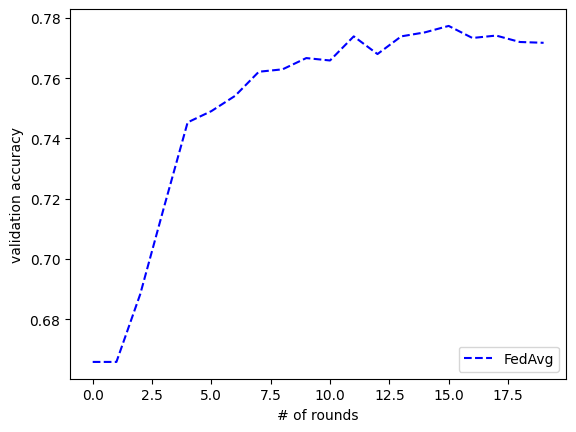

In [12]:
import time
import matplotlib.pyplot as plt
vali_accuracy=[]
time_arr=[]
for m in range (20):
    y_pred=global_model(vali_x)
    y_pred=tf.argmax(y_pred, axis=1)
    acc=acc_calculator(vali_y,y_pred)
    vali_accuracy.append(acc)
    start=time.time()
    w=Fedavg()
    end=time.time()
    global_model.set_weights(w)
    time_count=end-start
    time_arr.append(time_count)
    print(end-start)
    print('vali_acc=',acc)
plt.plot(vali_accuracy,'b--',label='FedAvg')
plt.xlabel('# of rounds')
plt.ylabel('validation accuracy')
plt.legend(loc='lower right')
plt.show()
# print('The avg time for per communication'+str(np.mean(time_arr)))


### Accuracy and fairness of FedAvg model

In [13]:
def EO_compuatation(y_pred, y_ture,s_sensitive):
    EO_list=[]
    y_pred=np.reshape(y_pred,(-1,))
    y_ture=np.reshape(y_ture,(-1,))
    s_sensitive=np.reshape(s_sensitive,(-1,))
    for i in range (4):
        tpr_sensitive=np.sum(np.where((y_pred==i)&(y_ture==i)&(s_sensitive==1),1,0))/np.sum(np.where((y_ture==i)&(s_sensitive==1),1,0))
        tpr_nonsensitive=np.sum(np.where((y_pred==i)&(y_ture==i)&(s_sensitive==0),1,0))/np.sum(np.where((y_ture==i)&(s_sensitive==0),1,0))
        EO=abs(tpr_sensitive-tpr_nonsensitive)
        if EO<1 or EO==1:
            EO_list.append(EO)
        else:
            EO_list.append(0.01)
    print(EO_list)
    EO=np.max(EO_list)
    return EO

In [14]:
y_pred=global_model(vali_x)
y_pred=tf.argmax(y_pred, axis=1)
vali_EO=EO_compuatation(y_pred, vali_y,vali_s)
print('global_EO=',vali_EO)
y_pred=global_model(vali_x)
y_pred=tf.argmax(y_pred, axis=1)
acc_count=np.where(y_pred==vali_y,1,0)
acc=sum(acc_count)/len(vali_y)
print('global_acc=',acc)


[0.14225774225774235, 0.12035890416911077, 0.021014790627690294, 0.13236929922135704]
global_EO= 0.14225774225774235
global_acc= 0.7709333333333334


In [15]:
vali_x_1=np.reshape(vali_x_1,(-1,28,28,3))
vali_x_2=np.reshape(vali_x_2,(-1,28,28,3))
vali_x_3=np.reshape(vali_x_3,(-1,28,28,3))
vali_x_4=np.reshape(vali_x_4,(-1,28,28,3))
vali_x_5=np.reshape(vali_x_5,(-1,28,28,3))

local_EO=[]
y_pred_1=global_model(vali_x_1)
y_pred_1=tf.argmax(y_pred_1, axis=1)
EO_1=EO_compuatation(y_pred_1, vali_y_1,vali_s_1)
local_EO.append(EO_1)
y_pred_2=global_model(vali_x_2)
y_pred_2=tf.argmax(y_pred_2, axis=1)
EO_2=EO_compuatation(y_pred_2, vali_y_2,vali_s_2)
local_EO.append(EO_2)
y_pred_3=global_model(vali_x_3)
y_pred_3=tf.argmax(y_pred_3, axis=1)
EO_3=EO_compuatation(y_pred_3, vali_y_3,vali_s_3)
local_EO.append(EO_3)
y_pred_4=global_model(vali_x_4)
y_pred_4=tf.argmax(y_pred_4, axis=1)
EO_4=EO_compuatation(y_pred_4, vali_y_4,vali_s_4)
local_EO.append(EO_4)
y_pred_5=global_model(vali_x_5)
y_pred_5=tf.argmax(y_pred_5, axis=1)
EO_5=EO_compuatation(y_pred_5, vali_y_5,vali_s_5)
local_EO.append(EO_5)
local_EO_avg=sum(local_EO)/len(local_EO)
print('local_EO=',local_EO_avg)
print('local_EO=',local_EO)

[0.18598130841121496, 0.43902439024390244, 0.023925314806773845, 0.5]
[0.2090909090909091, 0.046031746031746035, 0.05007573732513593, 0.23333333333333334]
[0.17025862068965514, 0.2050183598531212, 0.04320751712056059, 0.25]
[0.05711354309165528, 0.027419354838709664, 0.0014376135614879715, 0.05555555555555558]
[0.04972875226039786, 0.3058823529411765, 0.03796203796203801, 0.36363636363636365]
local_EO= 0.2808166480122705
local_EO= [0.5, 0.23333333333333334, 0.25, 0.05711354309165528, 0.36363636363636365]


# prepare the parameters for LP

In [16]:
def p_computation(label,sensitive_attribute,y,a):
    label=np.reshape(label,(-1,))
    sensitive_attribute=np.reshape(sensitive_attribute,(-1,))
    N=len(label)
    mask=(label==y)&(sensitive_attribute==a)
    p_y_a=np.sum(mask)/N
    return p_y_a
S=np.zeros((5,2,4))
p=[len(vali_x_1),len(vali_x_2),len(vali_x_3),len(vali_x_4),len(vali_x_5)]  
for c,(feature,labels,sensitive) in enumerate(([vali_x_1,vali_y_1,vali_s_1],[vali_x_2,vali_y_2,vali_s_2],[vali_x_3,vali_y_3,vali_s_3],[vali_x_4,vali_y_4,vali_s_4],[vali_x_5,vali_y_5,vali_s_5])):
    for a in range(2):
        for y in range(4):
            S[c][a][y]=p[c]*p_computation(labels,sensitive,y,a)/(len(vali_x_1)+len(vali_x_2)+len(vali_x_3)+len(vali_x_4)+len(vali_x_5))


In [17]:
TP=np.zeros((5,2,4))
def compute_TP (y_pred,label, sensitive_attribute, y, a):
    y_pred=np.reshape(y_pred,(-1,))
    label=np.reshape(label,(-1,))
    N=len(y_pred)
    sensitive_attribute=np.reshape(sensitive_attribute,(-1,))# Total number of samples
    # Create a boolean mask for where both conditions are met
    count_1= (y_pred == y) & (label == y) & (sensitive_attribute == a)
    count_2 = (label== y) & (sensitive_attribute == a)
    
    # Compute the probability
    TP_y_ac = np.sum(count_1) / np.sum(count_2)
    if TP_y_ac<1 or TP_y_ac==1:
        TP_y_ac=TP_y_ac
    else:
        TP_y_ac=0
    return TP_y_ac
for c,(feature,labels,sensitive) in enumerate (([vali_x_1,vali_y_1,vali_s_1],[vali_x_2,vali_y_2,vali_s_2],[vali_x_3,vali_y_3,vali_s_3],[vali_x_4,vali_y_4,vali_s_4],[vali_x_5,vali_y_5,vali_s_5])):
    y_pred=global_model(feature)
    y_pred=tf.argmax(y_pred, axis=1)
    for a in range(2):
        for y in range(4):
            TP[c][a][y]=compute_TP(y_pred,labels,sensitive,y,a)

In [18]:
def compute_alpha(label, sensitive_attribute, y, a):
    label=np.reshape(label,(-1,))
    N=len(label)
    sensitive_attribute=np.reshape(sensitive_attribute,(-1,))# Total number of samples
    # Create a boolean mask for where both conditions are met
    mask = (label == y) & (sensitive_attribute == a)
    # print(mask)
    # print("Number of matching samples:", np.sum(mask))
    
    # Compute the probability
    alpha_y_ac = np.sum(mask) / N
    return alpha_y_ac
alpha_a_y=np.zeros((2,4))
for a in range(2):
    for y in range(4):
        alpha_a_y[a][y]=compute_alpha(vali_y,vali_s,y,a)


In [19]:
from scipy.optimize import linprog
import numpy as np
def LP_EO(e_0,e_c):
    C=[]
    for c in range(5):
        for a in range(2):
            for y in range(4):
                C.append(-S[c][a][y])
    ## global fairness constraints
    A_1=[]
    A_2=[]
    A_3=[]
    A_4=[]

    for c in range(5):
        for a in range(2):
            for y in range(4):
                if a==0 and y==0:
                    A_1.append(-S[c][a][y]/alpha_a_y[a][y])
                elif a==1 and y==0:
                    A_1.append(S[c][a][y]/alpha_a_y[a][y])
                else:
                    A_1.append(0)
    for c in range(5):
        for a in range(2):
            for y in range(4):
                if a==0 and y==1:
                    A_2.append(-S[c][a][y]/alpha_a_y[a][y])
                elif a==1 and y==1:
                    A_2.append(S[c][a][y]/alpha_a_y[a][y])
                else:
                    A_2.append(0)
    for c in range(5):
        for a in range(2):
            for y in range(4):
                if a==0 and y==2:
                    A_3.append(-S[c][a][y]/alpha_a_y[a][y])
                elif a==1 and y==2:
                    A_3.append(S[c][a][y]/alpha_a_y[a][y])
                else:
                    A_3.append(0)
    for c in range(5):
        for a in range(2):
            for y in range(4):
                if a==0 and y==3:
                    A_4.append(-S[c][a][y]/alpha_a_y[a][y])
                elif a==1 and y==3:
                    A_4.append(S[c][a][y]/alpha_a_y[a][y])

                else:
                    A_4.append(0)
    A_1=np.array(A_1)
    A_2=np.array(A_2)
    A_3=np.array(A_3)
    A_4=np.array(A_4)
    ## define local fairness constraints
    basis_vector=np.eye(4)
    zero=np.zeros((4,4))
    row_1=np.hstack((basis_vector, -basis_vector, zero, zero, zero, zero, zero, zero, zero, zero))
    row_2=np.hstack((zero,zero, basis_vector, -basis_vector, zero, zero, zero, zero, zero, zero))
    row_3=np.hstack((zero,zero, zero, zero, basis_vector, -basis_vector, zero, zero, zero, zero))
    row_4=np.hstack((zero,zero, zero, zero, zero, zero, basis_vector, -basis_vector, zero, zero))
    row_5=np.hstack((zero,zero, zero, zero, zero, zero, zero, zero, basis_vector, -basis_vector))
    A_l=np.vstack((row_1,row_2,row_3,row_4,row_5))
    def K_ac_compute(a,c):
        K_ac = np.zeros((5, 4))  # 5 rows, 4 columns
        l_ac = np.zeros((5, 1))  # 5 rows, 1 column

        # Modify this line to assign only 4 elements (to match the number of columns in K_ac)
        K_ac[0:] = [-1, -1, -1, -1]  # 4 elements, matching the number of columns

        # Similarly adjust the rest of the assignments to match the column count of 4
        K_ac[1:] = [(1 - (TP[c, a, 1] + TP[c, a, 2] + TP[c, a, 3])), TP[c, a, 0], TP[c, a, 0], TP[c, a, 0]]
        K_ac[2:] = [TP[c, a, 1], (1 - (TP[c, a, 0] + TP[c, a, 2] + TP[c, a, 3])), TP[c, a, 1], TP[c, a, 1]]
        K_ac[3:] = [TP[c, a, 2], TP[c, a, 2], (1 - (TP[c, a, 0] + TP[c, a, 1] + TP[c, a, 3])), TP[c, a, 2]]
        K_ac[4:] = [TP[c, a, 3], TP[c, a, 3], TP[c, a, 3], (1 - (TP[c, a, 0] + TP[c, a, 1] + TP[c, a, 2]))]

        l_ac[0:] = [-1]
        l_ac[1:] = [TP[c, a, 0]]
        l_ac[2:] = [TP[c, a, 1]]
        l_ac[3:] = [TP[c, a, 2]]
        l_ac[4:] = [TP[c, a, 3]]
        return K_ac,l_ac
    k_01, l_01 = K_ac_compute(0, 0)
    k_11, l_11 = K_ac_compute(1, 0)
    k_02, l_02 = K_ac_compute(0, 1)
    k_12, l_12 = K_ac_compute(1, 1)
    k_03, l_03 = K_ac_compute(0, 2)
    k_13, l_13 = K_ac_compute(1, 2)
    k_04, l_04 = K_ac_compute(0, 3)
    k_14, l_14 = K_ac_compute(1, 3)
    k_05, l_05 = K_ac_compute(0, 4)
    k_15, l_15 = K_ac_compute(1, 4)


    M = np.zeros((50,40))  # 10 blocks of 6x5 matrices; resulting in a 60x25 matrix
    l = np.zeros((50, 1))   # Vector to match the 60 rows

    # Place each submatrix on the diagonal
    M[0:5, 0:4] = k_01    # Place k_01 in the top-left
    M[5:10, 4:8] = k_11  # Place k_11 in the next diagonal block
    M[10:15, 8:12] = k_02  # Place k_02 in the next diagonal block
    M[15:20, 12:16] = k_12  # Place k_12 in the next diagonal block
    M[20:25, 16:20] = k_03  # Place k_03 in the next diagonal block
    M[25:30, 20:24] = k_13    # Next row of blocks, place k_13
    M[30:35, 24:28] = k_04  # Place k_14 in the next block
    M[35:40, 28:32] = k_14 # Continue placing the remaining matrices
    M[40:45, 32:36] = k_05 # Place k_05
    M[45:50, 36:40] = k_15 # Place k_15 in the last block

    # Construct vector l
    l[0:5] = l_01
    l[5:10] = l_11
    l[10:15] = l_02
    l[15:20] = l_12
    l[20:25] = l_03
    l[25:30] = l_13
    l[30:35] = l_04
    l[35:40] = l_14
    l[40:45] = l_05
    l[45:50] = l_15
    A=np.vstack((A_1,A_2,A_3,A_4,A_l,-A_1,-A_2,-A_3,-A_4,-A_l,M))
    b_global=e_0*np.ones((4,1))
    b_local=e_c*np.ones((20,1))
    # print(b_local)
    b=np.vstack((b_global,b_local,b_global,b_local,l))
    # print(b)
    res = linprog(C, A_ub=A, b_ub=b)
    x=res.x
    x=np.reshape(x,(5,2,4))
    # print(x)
    # print(res.fun)
    return x
x=LP_EO(0.01,0.01)

## Solve the LAE and generate the fair prediction

In [20]:
vali_x_1=np.reshape(vali_x_1,(-1,28,28,3))
vali_x_2=np.reshape(vali_x_2,(-1,28,28,3))
vali_x_3=np.reshape(vali_x_3,(-1,28,28,3))
vali_x_4=np.reshape(vali_x_4,(-1,28,28,3))
vali_x_5=np.reshape(vali_x_5,(-1,28,28,3))
beta=np.zeros((5,2,5))
for c in range(5):
        for a in range(2):
            C=[0,0,0,0,0]
            A=np.array([[1,1,1,1,1],[TP[c,a,0],1,0,0,0],[TP[c,a,1],0,1,0,0],[TP[c,a,2],0,0,1,0],[TP[c,a,3],0,0,0,1]])
            b=np.array([1,x[c,a,0],x[c,a,1],x[c,a,2],x[c,a,3]])
            b=np.reshape(b,(5,1))
            res = linprog(C, A_eq=A, b_eq=b, bounds=(0,1))
            beta_ac=res.x
            beta[c,a,:]=beta_ac
            e=np.matmul(A,beta_ac)
beta=np.reshape(beta,(5,2,5))



def compute_tilde_Y(c,a, Y_hat,beta):
    """
    Compute \widetilde{Y}_{\boldsymbol{\beta}_{ac}}(x,a,c) based on given probabilities.

    Parameters:
    - beta_ac: Dictionary with keys 'beta_0' and 'beta_y' for probabilities.
    - Y_hat: The predicted value \hat{Y}(x,a,c).
    - y_values: List or array of possible y values in \mathcal{Y}.

    Returns:
    - tilde_Y: The computed value of \widetilde{Y}.
    """
    # Extract probabilities
    beta_0 = beta[c, a, 0]  # Probability for Y_hat
    beta_ac = beta[c, a, :] 
    # Probabilities for other y in \mathcal{Y}
    
    # Normalize probabilities
    
    # Generate a random number
    rand_val = random.random()
    # Determine the output based on random value
    if rand_val < beta_0:
        return Y_hat
    elif rand_val < beta_0 + beta_ac[1]:
        return 0
    elif rand_val < beta_0 + beta_ac[1] + beta_ac[2]:
        return 1
    elif rand_val < beta_0 + beta_ac[1] + beta_ac[2] + beta_ac[3]:
        return 2
    else: # Last value
        return 3

y_tilde_1=[]
y_tilde_2=[]
y_tilde_3=[]
y_tilde_4=[]
y_tilde_5=[]

# Example usage
for c, (feature, label, sensitive) in enumerate([(vali_x_1, vali_y_1, vali_s_1), (vali_x_2, vali_y_2, vali_s_2), (vali_x_3, vali_y_3, vali_s_3), (vali_x_4, vali_y_4, vali_s_4), (vali_x_5, vali_y_5, vali_s_5)]):
    y_pred=global_model.predict(feature)
    y_pred=tf.argmax(y_pred, axis=1)
    for i in range (len(y_pred)):
        a=sensitive[i]
        y_hat=y_pred[i]
        y_tilde=compute_tilde_Y(c,a,y_hat,beta)
        if c==0:
            y_tilde_1.append(y_tilde)
        elif c==1:
            y_tilde_2.append(y_tilde)
        elif c==2:
            y_tilde_3.append(y_tilde)
        elif c==3:
            y_tilde_4.append(y_tilde)
        elif c==4:
            y_tilde_5.append(y_tilde)

  

24/24 [==============================] - 0s 2ms/step


In [21]:

vali_tiled_y=np.concatenate((y_tilde_1,y_tilde_2,y_tilde_3,y_tilde_4,y_tilde_5),axis=0)
vali_tiled_y=np.reshape(vali_tiled_y,(-1,))
global_EO_post=EO_compuatation(vali_tiled_y,vali_y,vali_s)
print('global_EO=',global_EO_post)
local_EO_list_post=[]
local_EO_1=EO_compuatation(y_tilde_1,vali_y_1,vali_s_1)
local_EO_list_post.append(local_EO_1)
local_EO_2=EO_compuatation(y_tilde_2,vali_y_2,vali_s_2)
local_EO_list_post.append(local_EO_2)
local_EO_3=EO_compuatation(y_tilde_3,vali_y_3,vali_s_3)
local_EO_list_post.append(local_EO_3)
local_EO_4=EO_compuatation(y_tilde_4,vali_y_4,vali_s_4)
local_EO_list_post.append(local_EO_4)
local_EO_5=EO_compuatation(y_tilde_5,vali_y_5,vali_s_5)
local_EO_list_post.append(local_EO_5)
local_EO_avg_post=sum(local_EO_list_post)/len(local_EO_list_post)
print('local_EO=',local_EO_list_post)
local_EO_avg_post=sum(local_EO_list_post)/len(local_EO_list_post)
print('local_EO_avg_post=',local_EO_avg_post)


[0.002247752247752255, 0.020182928153989865, 0.0024489463519812293, 0.04560622914349277]
global_EO= 0.04560622914349277
[0.06915887850467292, 0.07317073170731707, 0.0017368649587493623, 0.16666666666666663]
[0.08414376321353065, 0.07936507936507936, 0.026819923371647514, 0.3666666666666667]
[0.017241379310344827, 0.023255813953488372, 0.00366300366300365, 0.0]
[0.027701778385772924, 0.027419354838709664, 0.03218657029331318, 0.16666666666666669]
[0.0, 0.0, 0.002331002331002363, 0.0]
local_EO= [0.16666666666666663, 0.3666666666666667, 0.023255813953488372, 0.16666666666666669, 0.002331002331002363]
local_EO_avg_post= 0.14511736325689814


In [22]:
acc_count=np.where(vali_tiled_y==vali_y,1,0)
acc_post=sum(acc_count)/len(vali_y)
print('global_acc_post=',acc_post)

global_acc_post= 0.6834666666666667


## result print


In [29]:
print('before_post_processing')
print('local_EO_avg:', local_EO_avg)
print('global_EO:', vali_EO)
print('global_acc:', acc)
print('after_post_processing')
print('local_EO_avg:', local_EO_avg_post)
print('global_EO:', global_EO_post)
print('global_acc:', acc_post)


before_post_processing
local_EO_avg: 0.2808166480122705
global_EO: 0.14225774225774235
global_acc: 0.7709333333333334
after_post_processing
local_EO_avg: 0.14511736325689814
global_EO: 0.04560622914349277
global_acc: 0.6834666666666667


In [24]:
# def run (g,l):
#     x=LP_EO(g,l)
#     beta=np.zeros((5,2,5))
#     for c in range(5):
#             for a in range(2):
#                 C=[0,0,0,0,0]
#                 A=np.array([[1,1,1,1,1],[TP[c,a,0],1,0,0,0],[TP[c,a,1],0,1,0,0],[TP[c,a,2],0,0,1,0],[TP[c,a,3],0,0,0,1]])
#                 b=np.array([1,x[c,a,0],x[c,a,1],x[c,a,2],x[c,a,3]])
#                 b=np.reshape(b,(5,1))
#                 res = linprog(C, A_eq=A, b_eq=b, bounds=(0,1))
#                 beta_ac=res.x
#                 beta[c,a,:]=beta_ac
#                 e=np.matmul(A,beta_ac)
#     beta=np.reshape(beta,(5,2,5))
#     y_tilde_1=[]
#     y_tilde_2=[]
#     y_tilde_3=[]
#     y_tilde_4=[]
#     y_tilde_5=[]

#     # Example usage
#     for c, (feature, label, sensitive) in enumerate([(vali_x_1, vali_y_1, vali_s_1), (vali_x_2, vali_y_2, vali_s_2), (vali_x_3, vali_y_3, vali_s_3), (vali_x_4, vali_y_4, vali_s_4), (vali_x_5, vali_y_5, vali_s_5)]):
#         y_pred=global_model.predict(feature)
#         y_pred=tf.argmax(y_pred, axis=1)
#         for i in range (len(y_pred)):
#             a=sensitive[i]
#             y_hat=y_pred[i]
#             y_tilde=compute_tilde_Y(c,a,y_hat,beta)
#             if c==0:
#                 y_tilde_1.append(y_tilde)
#             elif c==1:
#                 y_tilde_2.append(y_tilde)
#             elif c==2:
#                 y_tilde_3.append(y_tilde)
#             elif c==3:
#                 y_tilde_4.append(y_tilde)
#             elif c==4:
#                 y_tilde_5.append(y_tilde)
#     vali_tiled_y=np.concatenate((y_tilde_1,y_tilde_2,y_tilde_3,y_tilde_4,y_tilde_5),axis=0)
#     vali_tiled_y=np.reshape(vali_tiled_y,(-1,))
#     global_EO_post=EO_compuatation(vali_tiled_y,vali_y,vali_s)
#     local_EO_list_post=[]
#     local_EO_1=EO_compuatation(y_tilde_1,vali_y_1,vali_s_1)
#     local_EO_list_post.append(local_EO_1)
#     local_EO_2=EO_compuatation(y_tilde_2,vali_y_2,vali_s_2)
#     local_EO_list_post.append(local_EO_2)
#     local_EO_3=EO_compuatation(y_tilde_3,vali_y_3,vali_s_3)
#     local_EO_list_post.append(local_EO_3)
#     local_EO_4=EO_compuatation(y_tilde_4,vali_y_4,vali_s_4)
#     local_EO_list_post.append(local_EO_4)
#     local_EO_5=EO_compuatation(y_tilde_5,vali_y_5,vali_s_5)
#     local_EO_list_post.append(local_EO_5)
#     local_EO_avg_post=sum(local_EO_list_post)/len(local_EO_list_post)
#     print('local_EO=',local_EO_list_post)
#     local_EO_avg_post=sum(local_EO_list_post)/len(local_EO_list_post)
#     print('local_EO_avg_post=',local_EO_avg_post)
#     acc_count=np.where(vali_tiled_y==vali_y,1,0)
#     acc_post=sum(acc_count)/len(vali_y)
#     print('global_EO=',global_EO_post)
#     print('global_acc_post=',acc_post)
#     return local_EO_avg_post,global_EO_post,acc_post
# local_EO_avg_post,global_EO_post,acc_post=run(0.1,0.1)
    
    

In [25]:
# import numpy as np
# import scipy.stats as stats
# def compute_confidence_interval(data, confidence=0.95):
#     """
#     Compute the confidence interval for a given list of numbers.

#     Parameters:
#     data (list or array-like): List of numbers.
#     confidence (float): Confidence level for the interval.

#     Returns:
#     tuple: Mean and the margin of error for the confidence interval.
#     """
#     data = np.array(data)
#     n = len(data)
#     mean = np.mean(data)
#     std_err = stats.sem(data)  # Standard error of the mean
#     margin_of_error = std_err * stats.t.ppf((1 + confidence) / 2., n-1)

#     return mean, margin_of_error

In [26]:
# acc_map=[]
# lcoal_map=[]
# global_map=[]
# for l in [0.05,0.1,0.15,0.2,0.25,0.3]:
#     for g in [0.05,0.1,0.15,0.2,0.25,0.3]:
#         acc_list=[]
#         local_list=[]
#         global_list=[]
#         for _ in range (20):
#             local_SP,post_SP,acc=run(g,l)   
#             acc_list.append(acc)
#             local_list.append(local_SP)
#             global_list.append(post_SP)
#         acc_average_5_runs=np.mean(acc_list)
#         local_average_5_runs=np.mean(local_list)
#         global_average_5_runs=np.mean(global_list)
#         # mean_1, margin_1 = compute_confidence_interval(acc_list)
#         # mean_2, margin_2 = compute_confidence_interval(local_list)
#         # mean_3, margin_3 = compute_confidence_interval(global_list)


#         acc_map.append(acc_average_5_runs)
#         lcoal_map.append(local_average_5_runs)
#         global_map.append(global_average_5_runs)
# print(acc_map)
# print(lcoal_map)
# print(global_map)

In [27]:
# acc_map=np.reshape(acc_map,(6,6))
# local_map=np.reshape(lcoal_map,(6,6))
# global_map=np.reshape(global_map,(6,6))


In [28]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define the global disparity (x-axis) and local disparity (y-axis)
# global_disparity =[0.05,0.10,0.15,0.20,0.25,0.3]
# local_disparity = [0.05,0.10,0.15,0.20,0.25,0.3]

# # Create a 5x5 matrix representing the mean accuracy values (example data)
# accuracy_mean_matrix = np.array(acc_map
# )

# # Create a 5x5 matrix representing the variance of accuracy values (example data)

# # Create the heatmap plot
# fig, ax = plt.subplots()

# # Plot the mean accuracy matrix using imshow
# cax = ax.imshow(accuracy_mean_matrix, cmap='Blues', interpolation='nearest', aspect='auto', origin='lower', alpha=0.8)

# # Set the labels
# ax.set_xticks(np.arange(len(global_disparity)))
# ax.set_yticks(np.arange(len(local_disparity)))
# ax.set_xticklabels(global_disparity)
# ax.set_yticklabels(local_disparity)

# # Label axes and ensure they start from common 0
# # ax.set_xlabel('Global Disparity $\epsilon$')
# # ax.set_ylabel('Local Disparity $\epsilon_c$')

# # Add color bar for accuracy mean
# cbar = plt.colorbar(cax, ax=ax)
# cbar.set_label('Avg-Acc')

# # Set font size for text inside blocks
# font_size = 8  # Adjust this value for different sizes

# # Annotate each block with the mean ± variance
# for i in range(len(local_disparity)-2):
#     for j in range(len(global_disparity)):
#         mean = accuracy_mean_matrix[i+2, j]
#         ax.text(j, i+2, f'{mean:.3f}',
#                 ha='center', va='center', color='white', fontsize=14)
# for i in range(2):
#     for j in range(len(global_disparity)):
#         mean = accuracy_mean_matrix[i, j]
#         ax.text(j, i, f'{mean:.3f}',
#                 ha='center', va='center', color='black', fontsize=14)
# for i in range(6):
#     for j in range(1):
#         mean = accuracy_mean_matrix[i, j]
#         ax.text(j, i, f'{mean:.3f}',
#                 ha='center', va='center', color='black', fontsize=14)
# for i in [2]:
#     for j in [1]:
#         mean = accuracy_mean_matrix[i, j]
#         ax.text(j, i, f'{mean:.3f}',
#                 ha='center', va='center', color='black', fontsize=14)
# # for i in range(len(local_disparity)):
# #     for j in range(2):
# #         mean = accuracy_mean_matrix[i, j]
# #         ax.text(j, i, f'{mean:.3f}',
# #                 ha='center', va='center', color='black', fontsize=12)

# # Set the axes to start from a common origin
# ax.set_xlim(-0.5, len(global_disparity) - 0.5)
# ax.set_ylim(-0.5, len(local_disparity) - 0.5)

# # Set title
# # ax.set_title('Average Accuracy with different $(\epsilon_0, \epsilon_c)$')

# # Show the plot
# plt.show()